In [46]:
import os

os.makedirs("figs", exist_ok=True)
os.makedirs("resultados", exist_ok=True)

print("Listo: carpetas 'figs/' y 'resultados/' creadas.")


Listo: carpetas 'figs/' y 'resultados/' creadas.


In [57]:
#Libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [58]:
csv_path = "dataset_regresion_multiple.csv"

df = pd.read_csv(csv_path, sep=';')
display(df.head())
display(df.describe())
df.info()


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,41.600000,4.370000,73.28000,4.700000,59778.350000,19.760000,85.395000
std,13.311346,3.013957,14.29917,2.512595,23603.253158,11.136545,20.531869
min,20.000000,0.000000,50.00000,1.000000,20412.000000,0.000000,38.140000
25%,30.000000,2.000000,60.00000,3.000000,38042.000000,11.000000,72.045000
50%,41.500000,4.000000,73.00000,5.000000,58634.500000,18.500000,84.415000
75%,53.250000,7.000000,84.00000,7.000000,80475.250000,28.250000,98.465000
max,64.000000,9.000000,99.00000,9.000000,99605.000000,39.000000,137.270000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              100 non-null    int64  
 1   horas_ejercicio   100 non-null    int64  
 2   peso              100 non-null    int64  
 3   estres            100 non-null    int64  
 4   ingresos          100 non-null    int64  
 5   horas_tv          100 non-null    int64  
 6   presion_arterial  100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [59]:
#Correlaciones
corr = df.corr(numeric_only=True)
# Ordenamos por correlación absoluta con la variable objetivo
target = 'presion_arterial'
corr_target = corr[target].drop(target).sort_values(key=lambda s: s.abs(), ascending=False)
display(corr_target)


,presion_arterial
peso,0.588843
edad,0.418731
estres,0.366368
horas_ejercicio,-0.358865
horas_tv,0.040789
ingresos,-0.009394


In [60]:
#Train/Test + modelo completo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn import __version__ as skver

print("scikit-learn:", skver)

# y (objetivo) y X (predictoras)
y = df['presion_arterial'].values
X = df.drop(columns=['presion_arterial']).values

# Split 80/20 (reproducible)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline: estandarización + regresión lineal
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Métricas (RMSE = sqrt(MSE) para compatibilidad)
r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


scikit-learn: 1.6.1


(0.7077034441313692, np.float64(10.362358879704496), 8.59993812715626)

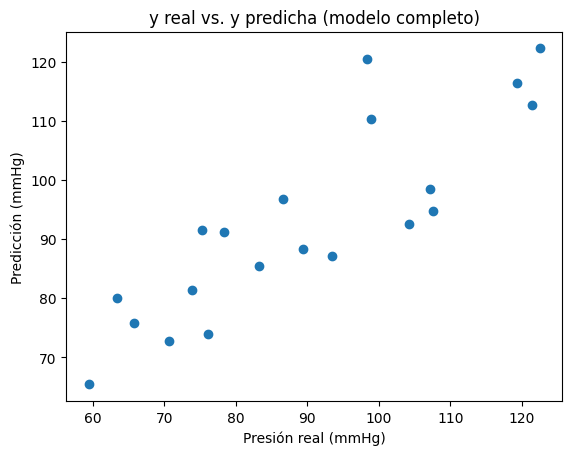

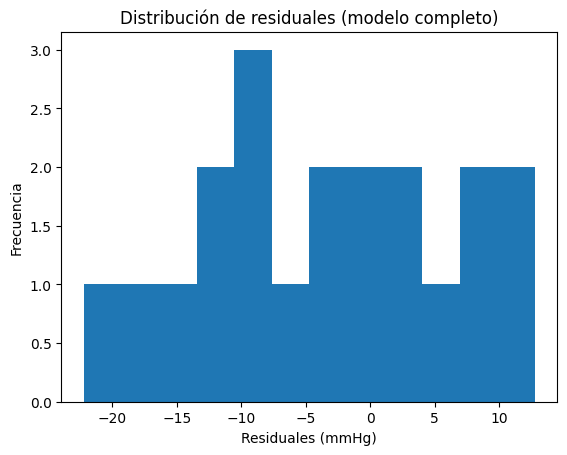

In [51]:
#Gráficos del modelo completo
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)

# y real vs. y predicha
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Presión real (mmHg)")
plt.ylabel("Predicción (mmHg)")
plt.title("y real vs. y predicha (modelo completo)")
plt.savefig("figs/y_real_vs_pred_regresion_multiple.png", bbox_inches="tight")
plt.show()

# Residuales
resid = y_test - y_pred
plt.figure()
plt.hist(resid, bins=12)
plt.xlabel("Residuales (mmHg)")
plt.ylabel("Frecuencia")
plt.title("Distribución de residuales (modelo completo)")
plt.savefig("figs/residuales_regresion_multiple.png", bbox_inches="tight")
plt.show()


In [61]:
#Top-3 variables por |correlación|
top3 = corr_target.index[:3].tolist()
top3


['peso', 'edad', 'estres']

In [62]:
#Modelo simplificado (solo Top-3)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

X2 = df[top3].values
y  = df['presion_arterial'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe2.fit(X2_train, y2_train)
y2_pred = pipe2.predict(X2_test)

r2_2   = r2_score(y2_test, y2_pred)
mse_2  = mean_squared_error(y2_test, y2_pred)
rmse_2 = np.sqrt(mse_2)               # <- sin 'squared'
mae_2  = mean_absolute_error(y2_test, y2_pred)

# Comparación: (completo) vs (simplificado)
(r2, rmse, mae), (r2_2, rmse_2, mae_2)


((0.7077034441313692, np.float64(10.362358879704496), 8.59993812715626),
 (0.6517118122799033, np.float64(11.311394593539546), 9.55455525987329))

In [63]:
#Ridge
from sklearn.linear_model import Ridge
import numpy as np

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))   # podés tunear alpha
])

pipe_ridge.fit(X_train, y_train)
y_pred_r = pipe_ridge.predict(X_test)

r2_r   = r2_score(y_test, y_pred_r)
mse_r  = mean_squared_error(y_test, y_pred_r)
rmse_r = np.sqrt(mse_r)           # <- sin 'squared'
mae_r  = mean_absolute_error(y_test, y_pred_r)

r2_r, rmse_r, mae_r


(0.710020617613846, np.float64(10.321203485124089), 8.637818799073898)

In [66]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def resumen_metricas(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_full, rmse_full, mae_full = resumen_metricas(y_test,  y_pred)   # modelo completo
r2_top3, rmse_top3, mae_top3 = resumen_metricas(y2_test, y2_pred)  # modelo Top-3

print(f"[COMPLETO]  R²={r2_full:.3f} | RMSE={rmse_full:.2f} | MAE={mae_full:.2f}")
print(f"[TOP-3]     R²={r2_top3:.3f} | RMSE={rmse_top3:.2f} | MAE={mae_top3:.2f}")

[COMPLETO]  R²=0.708 | RMSE=10.36 | MAE=8.60
[TOP-3]     R²=0.652 | RMSE=11.31 | MAE=9.55


In [67]:
import pandas as pd, os
os.makedirs("resultados", exist_ok=True)

# Correlaciones completas
corr.to_csv("resultados/correlaciones_regresion_multiple.csv")

# Coeficientes (importancia) del modelo completo
features = df.drop(columns=['presion_arterial']).columns
coef = pd.Series(pipe.named_steps['lr'].coef_, index=features)\
         .sort_values(key=lambda s: s.abs(), ascending=False)
coef.to_csv("resultados/coef_modelo_completo.csv")

print("Guardado en 'resultados/' y 'figs/' ✅")


Guardado en 'resultados/' y 'figs/' ✅
